# Projet SAM - Partie 1

Timothée Fronteau, Valentin Truong Minh Ky

In [2]:
# Pour que les changements dans les modules importés (par exemple sam_utils.py) soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Imports

import numpy as np
# from numpy import pi
import matplotlib.pyplot as plt
# from scipy.io import wavfile  # Pour lire et écrire des fichiers sons
# from scipy.signal import resample
# from scipy.signal import convolve2d
# from scipy.signal import convolve
# from sam_utils import plot_sound  # Pour afficher un son
# from sam_utils import plot_spectrum
# from sam_utils import show_spectrum_2d
# from keras.models import Sequential
# from keras.layers import Conv1D
# from pathlib import Path
import pandas as pd

In [4]:
# Charger des images 

# def load_img(entry, msdi_path="msdi/img/"):
#     return plt.imread(Path(msdi_path) / entry['img'])

# def load_mfcc(entry, msdi_path="../msdi/msdi_mapping.csv"):
#     x = np.load(Path(msdi_path) / entry['mfcc'])
#     return x[entry['msd_track_id']]

# def load_deep_audio_features(entry, msdi_path="../msdi/msdi_mapping.csv"):
#     subset_file = 'X_{}_audio_MSD-I.npy'.format(entry['set'])
#     x = np.load(Path(msdi_path) / 'deep_features' / subset_file, mmap_mode='r')
#     idx = entry['deep_features']
#     return x[idx, :]

# def get_label_list(msdi_path="../msdi/msdi_mapping.csv"):
#     df = pd.read_csv(Path(msdi_path) / 'labels.csv', header=None)
#     return list(df.iloc[:, 0])

Dans un premier temps, nous allons créer une architecture de base utilisant des GRU

In [6]:
msdi_mapping = pd.read_csv('msdi/msdi_mapping.csv', sep=";", index_col=0)
msdi_mapping

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,img,mfcc,deep_features
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,img/0000848744_200.jpg,mfcc/mfcc_A.npz,0
1,TRBLDQQ128F92E58B4,Rock,1,train,AR3RK011187FB3CE3B,http://artwork-cdn.7static.com/static/img/slee...,img/0000476534_200.jpg,mfcc/mfcc_B.npz,1
2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,img/0000062345_200.jpg,mfcc/mfcc_D.npz,2
3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,img/0000144785_200.jpg,mfcc/mfcc_J.npz,3
4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,img/0000520513_200.jpg,mfcc/mfcc_J.npz,4
...,...,...,...,...,...,...,...,...,...
30708,TRJRMVM128F4259C12,Punk,12066,test,ARC1SV21187FB4CF26,http://artwork-cdn.7static.com/static/img/slee...,img/0000250669_200.jpg,mfcc/mfcc_J.npz,4644
30709,TRJUGOK128F4243DA6,Pop,22364,test,AR5MK521187B98E0B8,http://artwork-cdn.7static.com/static/img/slee...,img/0000139188_200.jpg,mfcc/mfcc_J.npz,4645
30710,TRTMWUS128F425D9AF,Pop,8309,test,ARY2W5X1187FB3CB7A,http://artwork-cdn.7static.com/static/img/slee...,img/0000150164_200.jpg,mfcc/mfcc_T.npz,4646
30711,TRSBAKM128F931C033,Rap,16326,test,ARY47DB1187B9A801C,http://artwork-cdn.7static.com/static/img/slee...,img/0001059105_200.jpg,mfcc/mfcc_S.npz,4647


In [12]:
n_tracks, n_infos = msdi_mapping.shape
print(n_tracks, n_infos)

30712 9


img/0000848744_200.jpg
(200, 200, 3)
(200, 200, 3)


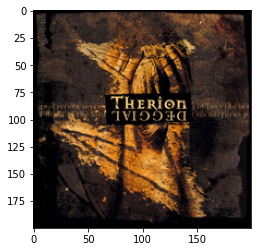

In [25]:
print(msdi_mapping['img'][0])
img1 = plt.imread("msdi/"+msdi_mapping['img'][0])
img2 = plt.imread("msdi/"+msdi_mapping['img'][10])
print(img1.shape)
print(img2.shape)
xdim, ydim, zdim = img1.shape
plt.imshow(img2)
# print(img2)

In [23]:
x_train = np.zeros((1000, xdim, ydim, zdim))
for idx in range(1000):
    x_train[idx] = plt.imread("msdi/"+msdi_mapping['img'][idx])/255

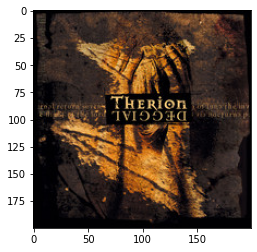

In [24]:
plt.imshow(x_train[10])

Okay maintenant Training Set, Test Set

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, ActivityRegularization, Lambda
# from keras.layers import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D
# from keras.layers import AveragePooling2D, Input
# from keras.utils import np_utils#, normalize
# from keras import backend as K

# import sklearn
# from sklearn.preprocessing import normalize

# from keras.applications.vgg19 import VGG19
# from keras.preprocessing.image import load_img, img_to_array
# from keras.preprocessing import image
# from keras.applications.vgg19 import preprocess_input
# from keras.models import Model

# dir_path  = 'miniMIT_Etus/train'
# listDir = sorted(os.listdir(dir_path))
# print(len(listDir))



# X_train = np.zeros(shape=(40*3,224,224,3), dtype=np.float32)# train batch

# Y_train = np.zeros(shape=(40*3,3))
# Y_train[0:40,0]=1
# Y_train[40:80,1]=1
# Y_train[80:120,2]=1


# cpt = 0
# for d in listDir: #[listDir[1],  listDir[2] ,listDir[4]]:
#   #read subfolder
#   listFiles = sorted(os.listdir(dir_path+'/'+d))
#   print(d)
#   print(len(listFiles))

#   for f in listFiles:
#     img = image.load_img(dir_path+'/'+d+'/'+f, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     #print(x.shape)
#     X_train[cpt,:,:,:] = x[0,:,:,:]
#     cpt+=1
#     # print(cpt)

In [ ]:
# network = VGG19(weights='imagenet')
# # print(network.summary())

# network2 = Model(inputs=network.input, outputs=network.get_layer('block4_pool').output)
# network2.trainable = False
# # print(network2.output_shape)


# #Building a new network to plug after the first one.    
# input_shape = (14,14,512)

# x = Input(shape=input_shape, name='input')
# y0 = AveragePooling2D((14,14), padding='same')(x)   ## Back to AveragePooling because better

# y0 = BatchNormalization()(y0)   ## Can be switched
# y0 = Flatten()(y0)              ## Can be switched
# y0 = Dropout(0.1)(y0)

# y0 = Dense(512, activation='relu')(y0)
# y0 = Dropout(0.1)(y0)

# y0 = Dense(20, activation='relu')(y0)

# y0 = Dense(3)(y0)
# y1 = Activation('softmax')(y0)

# model1 = Model(inputs=x,outputs=y1)
# model1.summary()

# #Combine the networks
# modelf = Model(inputs=network2.input, outputs=model1(network2.output))
# modelf.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])